In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Demand Data

In [3]:
demand_2014_2019 = pd.read_csv("./full_demand_data_2014_2019.csv")
demand_2014_2019.shape

(105168, 20)

In [4]:
renewable= pd.read_csv("./renewable_2009_2019.csv")
renewable = renewable.set_index('DATETIME')
renewable.index = pd.to_datetime(renewable.index, dayfirst = True)
renewable_2014_2019 = renewable[renewable.index.year == 2016]
renewable_2014_2019 = renewable_2014_2019[renewable_2014_2019.index.month == 2]

System Selling Prices

In [5]:
ssp = pd.read_csv("ssp_2014_2019.csv")
ssp.shape

(105168, 7)

In [463]:
# reading market price data
market_data  = ["MID_2014.csv", "MID_2015.csv", "MID_2016.csv", "MID_2017.csv", "MID_2018.csv", "MID_2019.csv"]
full_market_data = pd.DataFrame()
for i in range(0, len(market_data)):
    market = pd.read_csv("../DATA/MarketPriceData/" + market_data[i], encoding = 'unicode_escape')
    full_market_data = pd.concat([full_market_data, market], axis=0)
full_market_data = full_market_data[full_market_data["Market Index Data Provider Id"] != "N2EXMIDP"]
full_market_data.shape
full_market_data.to_csv("full_market_data.csv")


Exploring market price data

In [7]:
market_data_2014_2019 = pd.read_csv("./full_market_data.csv")
market_data_2014_2019.shape


(105168, 6)

In [390]:
# Getting renewable data
renewable= pd.read_csv("./renewable_2009_2019.csv")
renewable = renewable.set_index('DATETIME')
renewable.index = pd.to_datetime(renewable.index, dayfirst = True)
renewable_2014_2019 = renewable[renewable.index.year >= 2014]
renewable_2014_2019 = renewable_2014_2019[renewable_2014_2019.index.year <= 2019]
renewable_2014_2019.to_csv("renewable_2014_2019.csv")

Reading all the data from 2014 - 2019 for demand, renewable, ssp and market data

In [8]:
ssp = pd.read_csv("./ssp_2014_2019.csv")
sbp = pd.read_csv("./sbp_2014_2019.csv")
demand = pd.read_csv("./full_demand_data_2014_2019.csv")
market_data = pd.read_csv("./full_market_data.csv")
renewable = pd.read_csv("./renewable_2014_2019.csv")

Demand and target

In [11]:
demand["market price"] = market_data["Market Index Price"]

C:\Users\user\AppData\Local\Temp\ipykernel_17376\109270993.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(demand.corr(), annot=True)


<Axes: >

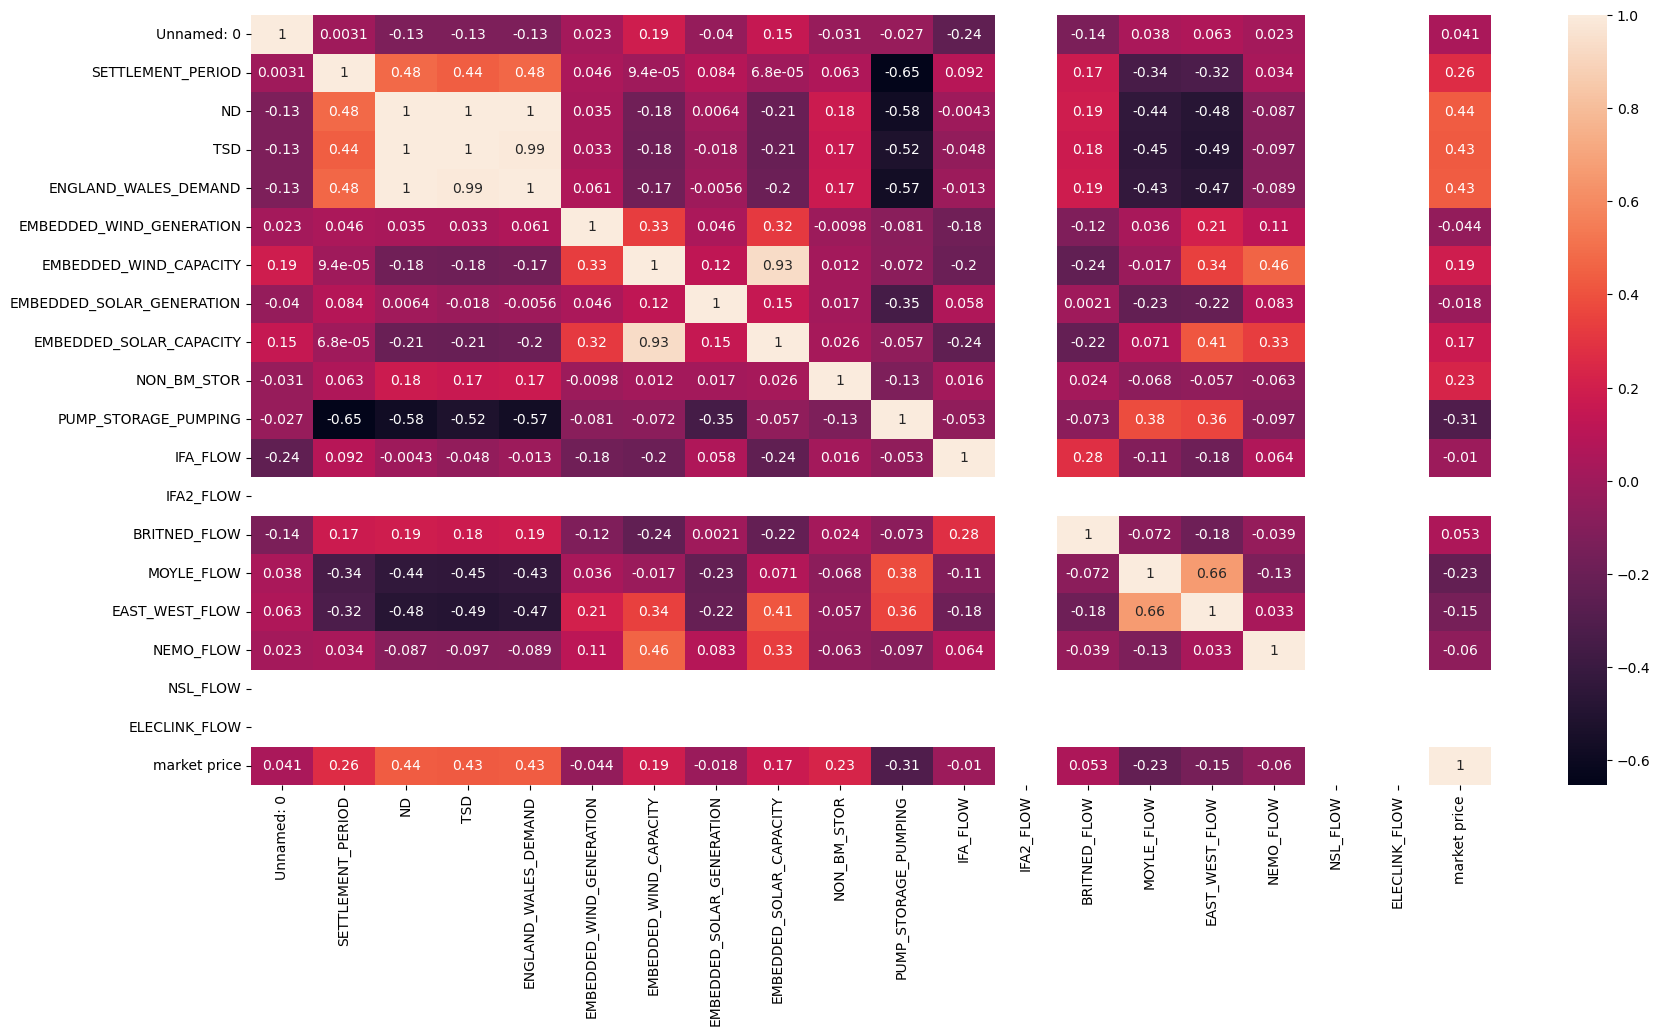

In [13]:

# plt.title("Demand correlation")
plt.figure(figsize=(20,10))
sns.heatmap(demand.corr(), annot=True)

Correlation between market Price and Renewable Data

C:\Users\user\AppData\Local\Temp\ipykernel_17376\2395511759.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  renewable.corr(method='pearson')
C:\Users\user\AppData\Local\Temp\ipykernel_17376\2395511759.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(renewable.corr(), annot=True)


<Axes: >

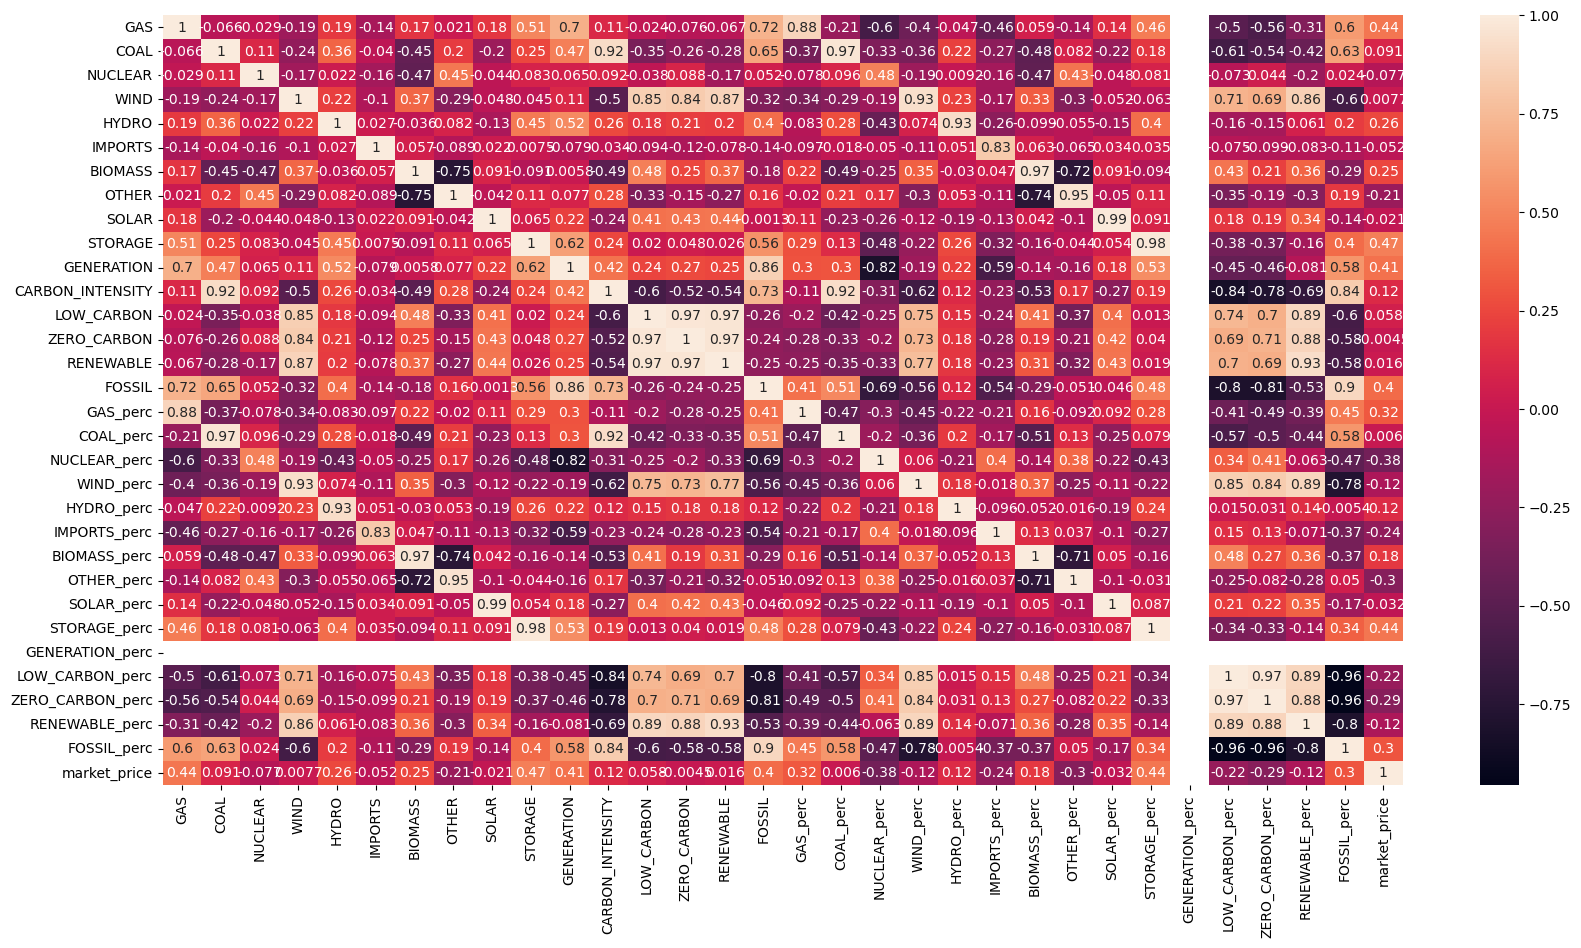

In [14]:
renewable['market_price'] = market_data["Market Index Price"]
renewable.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(renewable.corr(), annot=True)


Correlation between market Price and ssp Data

C:\Users\user\AppData\Local\Temp\ipykernel_17376\165789389.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ssp.corr(), annot=True)


<Axes: >

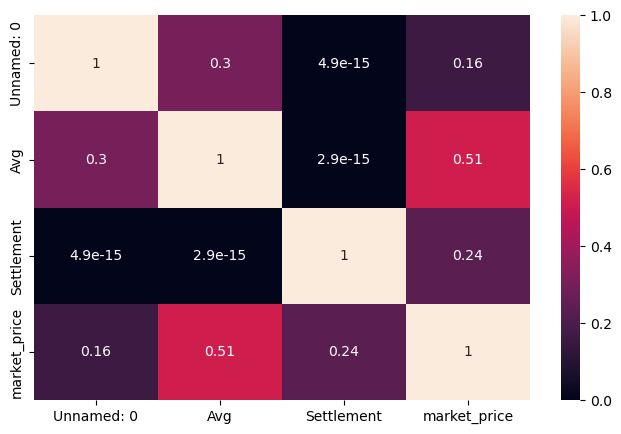

In [15]:
ssp['market_price'] = market_data["Market Index Price"]
plt.figure(figsize=(8,5))
sns.heatmap(ssp.corr(), annot=True)

Market Volume and Market Price Correlation

In [16]:
market_data = market_data.drop(columns = ["Unnamed: 0"])

In [17]:
market_data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_17376\678751306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  market_data.corr()


,Settlement Period,Market Index Volume (MWh),Market Index Price
Settlement Period,1.000000,0.494285,0.263816
Market Index Volume (MWh),0.494285,1.000000,0.158865
Market Index Price,0.263816,0.158865,1.000000


In [19]:
# reading net data
net = pd.read_csv("./net_imbalance.csv")
market_data_2019 = pd.read_csv("../DATA/MarketPriceData/MID_2019.csv")
market_data_2019 = market_data_2019[market_data_2019["Market Index Data Provider Id"] != "N2EXMIDP"]
net["market Price"] = market_data_2019["Market Index Price"]
net.corr("pearson")

C:\Users\user\AppData\Local\Temp\ipykernel_17376\3564173383.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  net.corr("pearson")


,Settlement Period,System Sell Price(GBP/MWh),System Buy Price(GBP/MWh),Net Imbalance Volume(MWh),market Price
Settlement Period,1.000000,0.069975,0.069975,0.067520,0.152371
System Sell Price(GBP/MWh),0.069975,1.000000,1.000000,0.302891,0.119233
System Buy Price(GBP/MWh),0.069975,1.000000,1.000000,0.302891,0.119233
Net Imbalance Volume(MWh),0.067520,0.302891,0.302891,1.000000,-0.056500
market Price,0.152371,0.119233,0.119233,-0.056500,1.000000


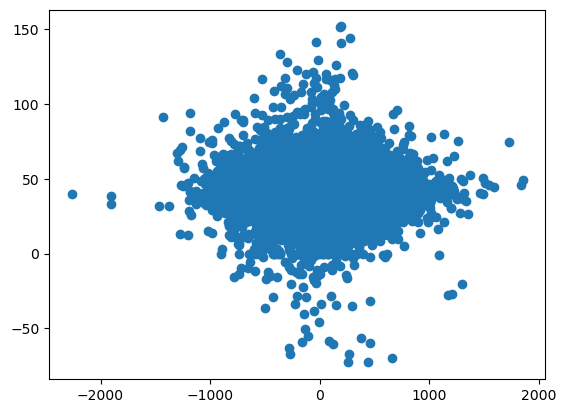

In [20]:
plt.scatter(net["Net Imbalance Volume(MWh)"], net["market Price"])

SELECTING THE VARIABLES

In [488]:
df = pd.DataFrame()
ssp = pd.read_csv("./ssp_2014_2019.csv")

demand = pd.read_csv("./full_demand_data_2014_2019.csv")
market_data = pd.read_csv("./full_market_data.csv")
renewable = pd.read_csv("./renewable_2014_2019.csv")
ssp
df["Date"] = ssp["Date"]
df["ND"] = demand["ND"]
df["TSD"] = demand["TSD"]
df["ENGLAND_WALES"] = demand["ENGLAND_WALES_DEMAND"]
df["GAS"] = renewable["GAS"]
df["GENERATION"] = renewable["GENERATION"]
df["FOSSIL"] = renewable["FOSSIL"]
df["STORAGE"] = renewable["STORAGE"]
df["NUCLEAR_perc"] = renewable["NUCLEAR_perc"]
df["SSP_Avg"] = ssp.Avg
df["Market Price"] = market_data["Market Index Price"]
df
df.to_csv("predict_electricity_data.csv",)